In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
#Build a classifier to predict hte service category for unknown cases using K-Nearest Neighbors
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [10]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [20]:
corelation_all=df.corr()
corelation=df.corr()["custcat"].drop("custcat")
print(corelation_all)
print(corelation)

           region    tenure       age   marital   address    income        ed  \
region   1.000000  0.016388  0.015034 -0.080637  0.010320  0.023765 -0.057952   
tenure   0.016388  1.000000  0.490217  0.154171  0.522952  0.242912 -0.109797   
age      0.015034  0.490217  1.000000 -0.014433  0.660435  0.327948 -0.154857   
marital -0.080637  0.154171 -0.014433  1.000000 -0.012051 -0.043984  0.001400   
address  0.010320  0.522952  0.660435 -0.012051  1.000000  0.226781 -0.128330   
income   0.023765  0.242912  0.327948 -0.043984  0.226781  1.000000  0.113939   
ed      -0.057952 -0.109797 -0.154857  0.001400 -0.128330  0.113939  1.000000   
employ   0.016335  0.520288  0.670047 -0.002891  0.463291  0.516349 -0.228580   
retire   0.005595  0.171143  0.429440 -0.078109  0.292503 -0.083651 -0.114229   
gender   0.050596  0.023533 -0.011419  0.008345  0.008363  0.038706  0.006704   
reside  -0.065158 -0.036592 -0.254993  0.625999 -0.201645 -0.097591  0.021045   
custcat -0.023771  0.166691 

<Axes: >

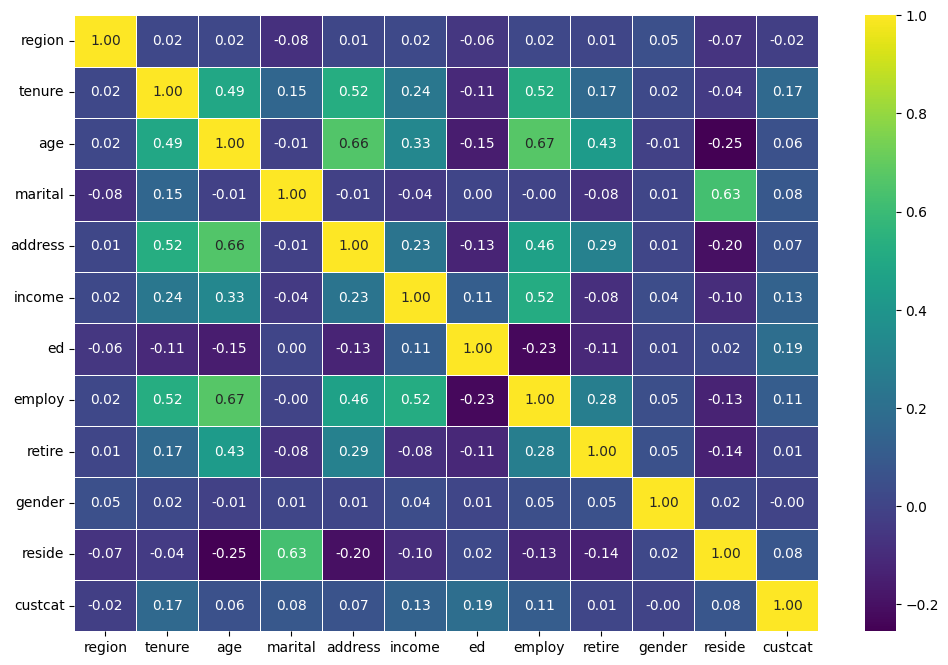

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(corelation_all, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [37]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
print(correlation_values)

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64


In [44]:
X=df.drop(["custcat"],axis=1)
print(X)
y=df["custcat"]
print("these are values of y",y)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  
0         0       2  
1         0       6  
2         1       2  
3         1       1  
4

In [60]:
X_norm=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_norm,y,test_size=0.3,random_state=42)
k=3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model= knn_classifier.fit(X_train,y_train)
yhat =knn_model.predict(X_test)
print(yhat[0:5])



[2 2 3 3 3]


In [63]:
print(y_test[0:5])
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

521    2
737    1
740    2
660    3
411    1
Name: custcat, dtype: int64
Test set Accuracy:  0.32666666666666666
